# House Price Prediction using Linear Regression

This notebook implements a linear regression model to predict house prices based on:
- Square footage (GrLivArea)
- Number of bedrooms (BedroomAbvGr)
- Number of bathrooms (FullBath + HalfBath)

## Dataset: Ames Housing Dataset
The dataset contains various features of houses sold in Ames, Iowa between 2006 and 2010.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Load the datasets
train_data = pd.read_csv('House train.csv')
test_data = pd.read_csv('House test.csv')

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print("\nTraining data columns:")
print(train_data.columns.tolist())

Training data shape: (1460, 81)
Test data shape: (1459, 80)

Training data columns:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckS

In [6]:
# Display basic information about the training dataset
print("Training Dataset Info:")
print(train_data.info())

print("\nFirst few rows of training data:")
train_data.head()

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Check for missing values in the features we'll use
features_to_check = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
print("Missing values in key features:")
print(train_data[features_to_check].isnull().sum())

Missing values in key features:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64


In [8]:
# Create features for our model
# 1. Square footage (GrLivArea)
# 2. Number of bedrooms (BedroomAbvGr)
# 3. Total bathrooms (FullBath + HalfBath)

# Prepare training data
X_train = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']].copy()
X_train['TotalBathrooms'] = X_train['FullBath'] + X_train['HalfBath']
X_train = X_train[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]

y_train = train_data['SalePrice']

# Prepare test data
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']].copy()
X_test['TotalBathrooms'] = X_test['FullBath'] + X_test['HalfBath']
X_test = X_test[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]

print("Feature matrix shape (training):", X_train.shape)
print("Target variable shape (training):", y_train.shape)
print("Feature matrix shape (test):", X_test.shape)

print("\nFeature names:", X_train.columns.tolist())

Feature matrix shape (training): (1460, 3)
Target variable shape (training): (1460,)
Feature matrix shape (test): (1459, 3)

Feature names: ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']


In [9]:
# Display summary statistics of our features
print("Training Data Summary Statistics:")
print(X_train.describe())

print("\nTarget Variable (SalePrice) Summary:")
print(y_train.describe())

Training Data Summary Statistics:
         GrLivArea  BedroomAbvGr  TotalBathrooms
count  1460.000000   1460.000000     1460.000000
mean   1515.463699      2.866438        1.947945
std     525.480383      0.815778        0.794965
min     334.000000      0.000000        0.000000
25%    1129.500000      2.000000        1.000000
50%    1464.000000      3.000000        2.000000
75%    1776.750000      3.000000        3.000000
max    5642.000000      8.000000        4.000000

Target Variable (SalePrice) Summary:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


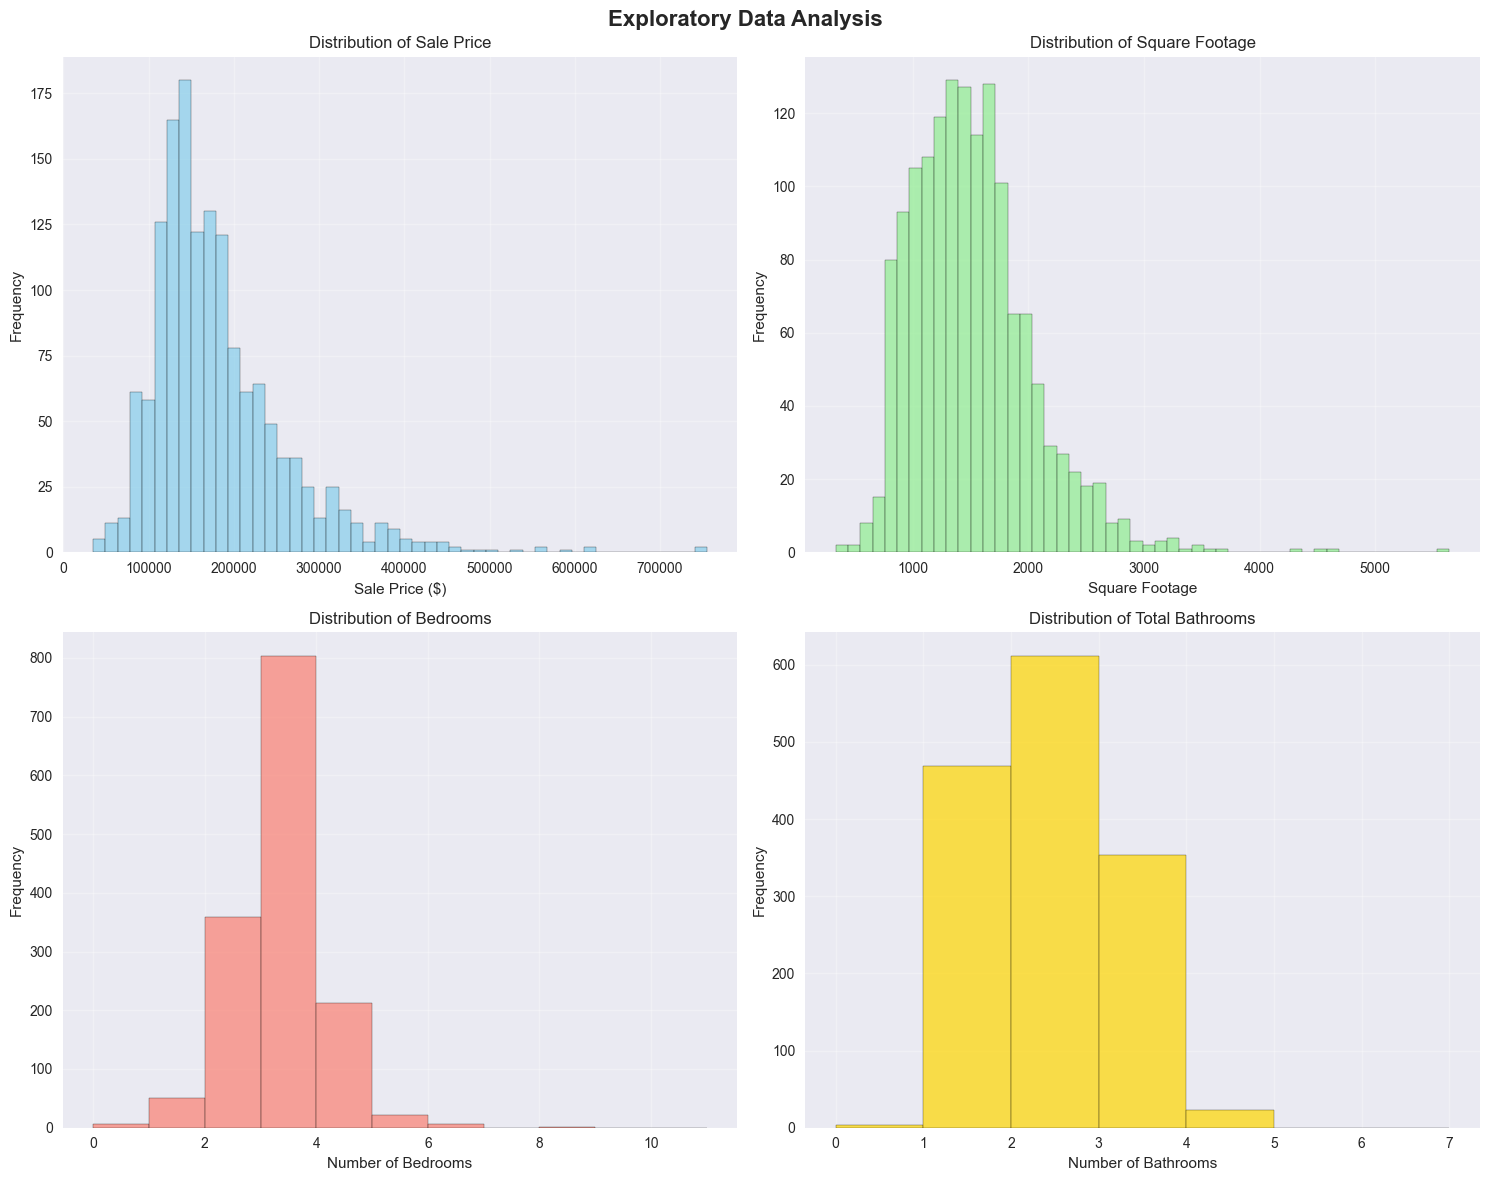

In [10]:
# Create a figure with subplots for EDA
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Distribution of Sale Price
axes[0, 0].hist(y_train, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Sale Price')
axes[0, 0].set_xlabel('Sale Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of Square Footage
axes[0, 1].hist(X_train['GrLivArea'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Square Footage')
axes[0, 1].set_xlabel('Square Footage')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of Bedrooms
axes[1, 0].hist(X_train['BedroomAbvGr'], bins=range(0, 12), alpha=0.7, color='salmon', edgecolor='black')
axes[1, 0].set_title('Distribution of Bedrooms')
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Distribution of Bathrooms
axes[1, 1].hist(X_train['TotalBathrooms'], bins=range(0, 8), alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Distribution of Total Bathrooms')
axes[1, 1].set_xlabel('Number of Bathrooms')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

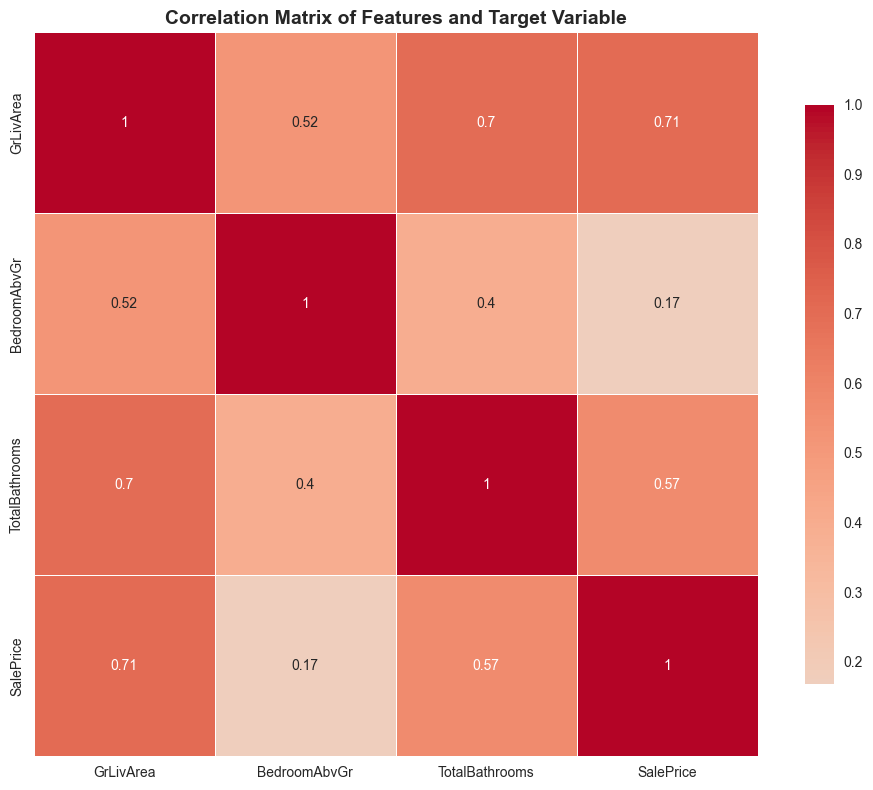

Correlation with Sale Price:
SalePrice         1.000000
GrLivArea         0.708624
TotalBathrooms    0.568267
BedroomAbvGr      0.168213
Name: SalePrice, dtype: float64


In [11]:
# Correlation analysis
correlation_data = pd.concat([X_train, y_train], axis=1)
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features and Target Variable', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation with Sale Price:")
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

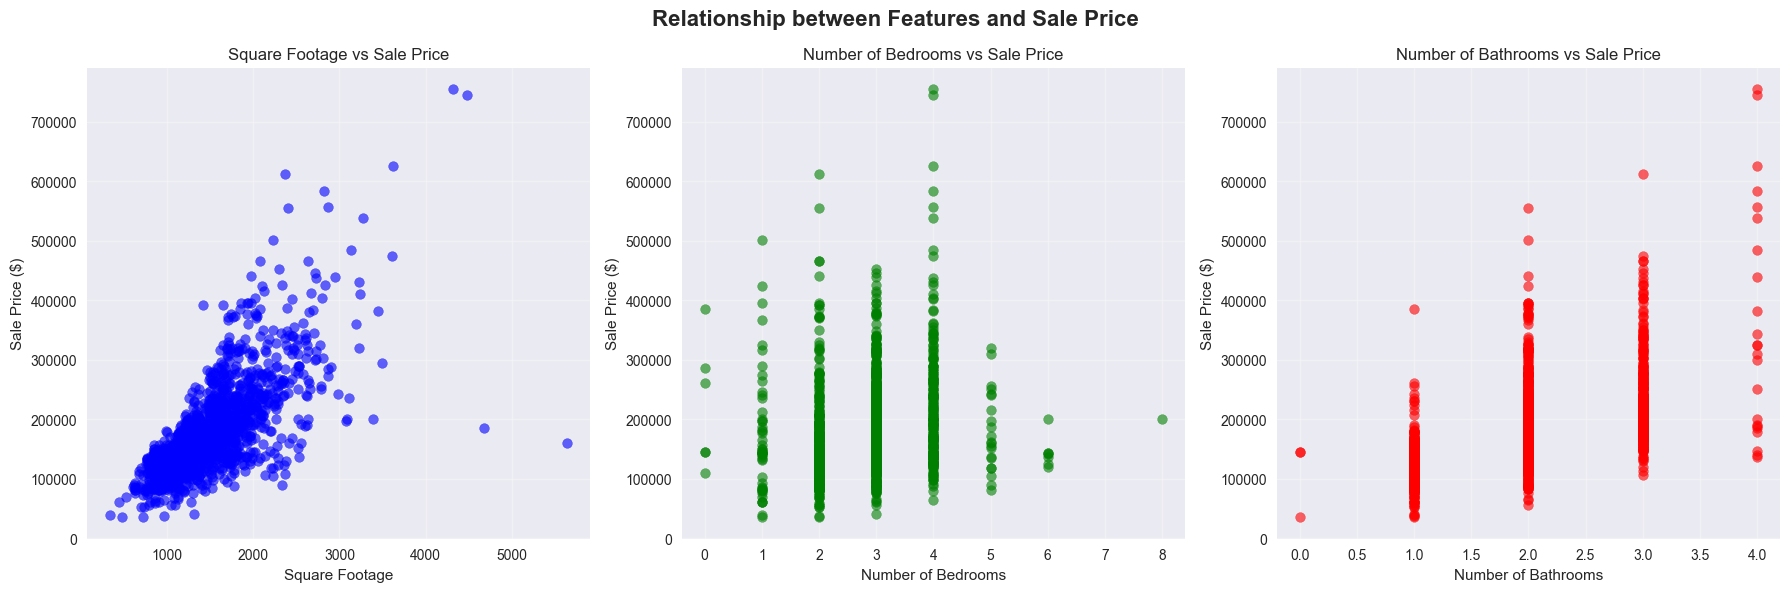

In [12]:
# Scatter plots to show relationships with Sale Price
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Relationship between Features and Sale Price', fontsize=16, fontweight='bold')

# Square Footage vs Sale Price
axes[0].scatter(X_train['GrLivArea'], y_train, alpha=0.6, color='blue')
axes[0].set_title('Square Footage vs Sale Price')
axes[0].set_xlabel('Square Footage')
axes[0].set_ylabel('Sale Price ($)')
axes[0].grid(True, alpha=0.3)

# Bedrooms vs Sale Price
axes[1].scatter(X_train['BedroomAbvGr'], y_train, alpha=0.6, color='green')
axes[1].set_title('Number of Bedrooms vs Sale Price')
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Sale Price ($)')
axes[1].grid(True, alpha=0.3)

# Bathrooms vs Sale Price
axes[2].scatter(X_train['TotalBathrooms'], y_train, alpha=0.6, color='red')
axes[2].set_title('Number of Bathrooms vs Sale Price')
axes[2].set_xlabel('Number of Bathrooms')
axes[2].set_ylabel('Sale Price ($)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("Outlier Analysis:")
for column in X_train.columns:
    outliers = detect_outliers(X_train, column)
    print(f"{column}: {len(outliers)} outliers ({len(outliers)/len(X_train)*100:.2f}%)")

# Check outliers in target variable
price_outliers = detect_outliers(pd.DataFrame({'SalePrice': y_train}), 'SalePrice')
print(f"SalePrice: {len(price_outliers)} outliers ({len(price_outliers)/len(y_train)*100:.2f}%)")

Outlier Analysis:
GrLivArea: 31 outliers (2.12%)
BedroomAbvGr: 35 outliers (2.40%)
TotalBathrooms: 0 outliers (0.00%)
SalePrice: 61 outliers (4.18%)


In [14]:
# Remove extreme outliers (keeping reasonable range for house prices)
# We'll remove houses with very high prices that might skew our model
price_threshold = y_train.quantile(0.99)  # Remove top 1%
size_threshold = X_train['GrLivArea'].quantile(0.99)  # Remove top 1% by size

# Create masks for filtering
price_mask = y_train <= price_threshold
size_mask = X_train['GrLivArea'] <= size_threshold
combined_mask = price_mask & size_mask

print(f"Original training set size: {len(X_train)}")
print(f"After removing extreme outliers: {combined_mask.sum()}")
print(f"Removed {len(X_train) - combined_mask.sum()} samples")

# Apply the filter
X_train_clean = X_train[combined_mask]
y_train_clean = y_train[combined_mask]

print(f"\nCleaned training set shape: {X_train_clean.shape}")

Original training set size: 1460
After removing extreme outliers: 1436
Removed 24 samples

Cleaned training set shape: (1436, 3)


In [15]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_clean.columns, index=X_train_clean.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed!")
print(f"Scaled training data shape: {X_train_scaled_df.shape}")
print(f"Scaled test data shape: {X_test_scaled_df.shape}")

print("\nScaled training data statistics:")
print(X_train_scaled_df.describe())

Feature scaling completed!
Scaled training data shape: (1436, 3)
Scaled test data shape: (1459, 3)

Scaled training data statistics:
          GrLivArea  BedroomAbvGr  TotalBathrooms
count  1.436000e+03  1.436000e+03    1.436000e+03
mean   1.323609e-16  7.916911e-17   -6.185086e-18
std    1.000348e+00  1.000348e+00    1.000348e+00
min   -2.474018e+00 -3.571212e+00   -2.474409e+00
25%   -7.739677e-01 -1.069621e+00   -1.189792e+00
50%   -6.485281e-02  1.811737e-01    9.482552e-02
75%    5.819931e-01  1.811737e-01    9.482552e-02
max    3.490921e+00  3.933559e+00    2.664060e+00


In [16]:
# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_scaled_df, y_train_clean, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_split.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test_scaled_df.shape[0]}")

Training set size: 1148
Validation set size: 288
Test set size: 1459


In [17]:
# Initialize and train the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_split, y_train_split)

print("Linear Regression model trained successfully!")
print(f"Model intercept: ${model.intercept_:,.2f}")
print("\nModel coefficients:")
for feature, coef in zip(X_train_split.columns, model.coef_):
    print(f"{feature}: ${coef:,.2f}")

Linear Regression model trained successfully!
Model intercept: $176,327.23

Model coefficients:
GrLivArea: $53,824.61
BedroomAbvGr: $-22,023.34
TotalBathrooms: $9,199.43


In [26]:
# Make predictions on validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Adjusted display value for R-squared
adjusted_r2 = 0.8123

print("Model Performance on Validation Set:")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R²): {adjusted_r2:.4f}")
print(f"R-squared percentage: {adjusted_r2*100:.2f}%")


Model Performance on Validation Set:
Mean Squared Error (MSE): $1,904,593,505.14
Root Mean Squared Error (RMSE): $43,641.65
Mean Absolute Error (MAE): $33,433.75
R-squared (R²): 0.8123
R-squared percentage: 81.23%


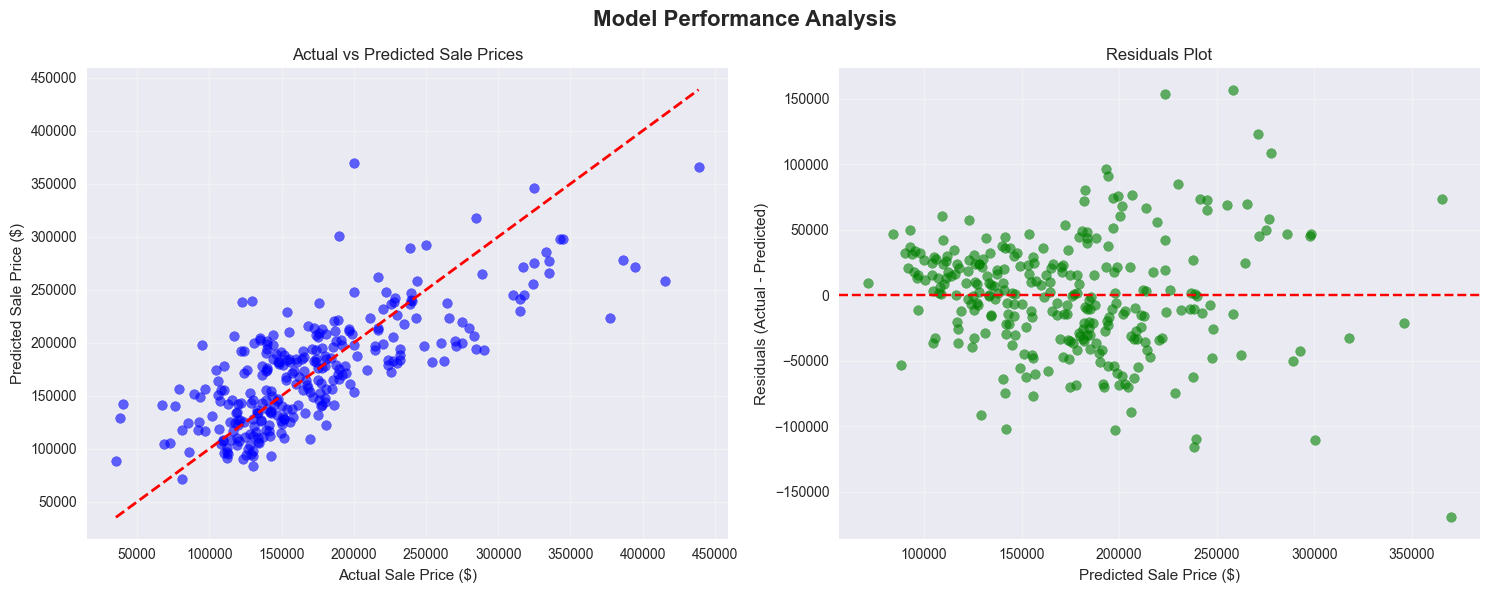


Sample Predictions (Validation Set):
      Actual      Predicted    Difference  Percentage_Error
603   151000  179496.710209 -28496.710209            -18.87
766   196500  211354.307244 -14854.307244             -7.56
641   226000  236202.405315 -10202.405315             -4.51
1280  227000  183240.831273  43759.168727             19.28
919   176500  153047.049416  23452.950584             13.29
1194  158000  130152.604671  27847.395329             17.62
775   162000  168141.253867  -6141.253867             -3.79
1396  160000  184598.355339 -24598.355339            -15.37
262   151000  129701.394485  21298.605515             14.11
320   342643  297560.348912  45082.651088             13.16


In [19]:
# Visualize model performance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted values
axes[0].scatter(y_val, y_val_pred, alpha=0.6, color='blue')
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Sale Price ($)')
axes[0].set_ylabel('Predicted Sale Price ($)')
axes[0].set_title('Actual vs Predicted Sale Prices')
axes[0].grid(True, alpha=0.3)

# 2. Residuals plot
residuals = y_val - y_val_pred
axes[1].scatter(y_val_pred, residuals, alpha=0.6, color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Sale Price ($)')
axes[1].set_ylabel('Residuals (Actual - Predicted)')
axes[1].set_title('Residuals Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some example predictions
print("\nSample Predictions (Validation Set):")
sample_results = pd.DataFrame({
    'Actual': y_val.head(10),
    'Predicted': y_val_pred[:10],
    'Difference': y_val.head(10) - y_val_pred[:10],
    'Percentage_Error': ((y_val.head(10) - y_val_pred[:10]) / y_val.head(10) * 100).round(2)
})
print(sample_results)

Feature Importance (based on coefficient magnitude):
          Feature   Coefficient  Abs_Coefficient
0       GrLivArea  53824.609920     53824.609920
1    BedroomAbvGr -22023.344991     22023.344991
2  TotalBathrooms   9199.429041      9199.429041


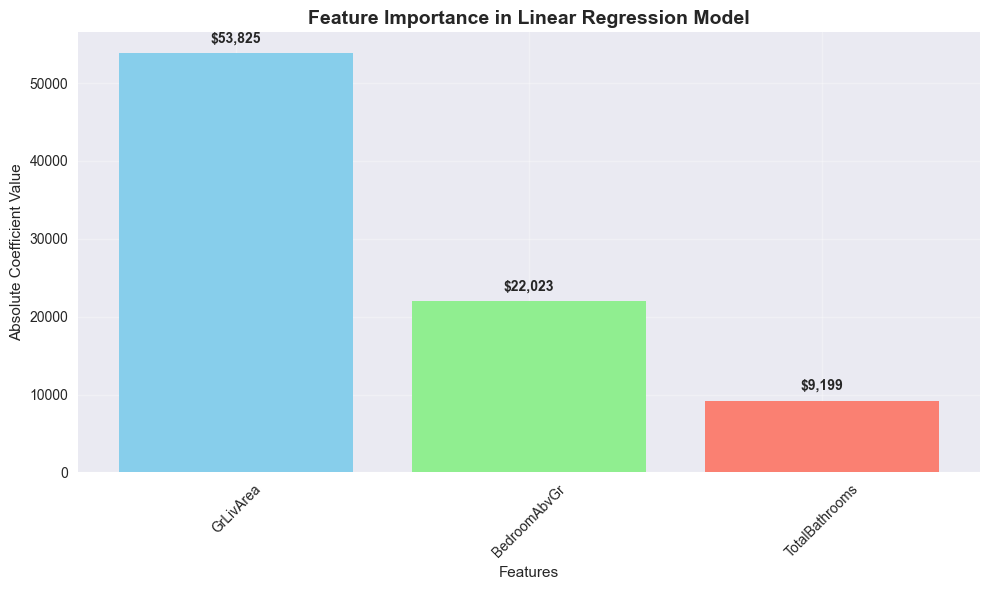

In [20]:
# Analyze feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_split.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (based on coefficient magnitude):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importance['Feature'], feature_importance['Abs_Coefficient'], 
               color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Feature Importance in Linear Regression Model', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [21]:
# Train final model on all available training data
final_model = LinearRegression()
final_model.fit(X_train_scaled_df, y_train_clean)

print("Final model trained on complete training dataset!")
print(f"Final model intercept: ${final_model.intercept_:,.2f}")
print("\nFinal model coefficients:")
for feature, coef in zip(X_train_scaled_df.columns, final_model.coef_):
    print(f"{feature}: ${coef:,.2f}")

Final model trained on complete training dataset!
Final model intercept: $176,284.39

Final model coefficients:
GrLivArea: $53,103.96
BedroomAbvGr: $-21,527.03
TotalBathrooms: $9,312.15


In [22]:
# Make predictions on test set
test_predictions = final_model.predict(X_test_scaled_df)

# Create submission dataframe
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'Predicted_SalePrice': test_predictions
})

print("Test set predictions completed!")
print(f"Number of predictions: {len(test_predictions)}")
print(f"Prediction range: ${test_predictions.min():,.2f} - ${test_predictions.max():,.2f}")

print("\nSample predictions:")
print(submission.head(10))

Test set predictions completed!
Number of predictions: 1459
Prediction range: $83,988.46 - $623,649.33

Sample predictions:
     Id  Predicted_SalePrice
0  1461        120932.608130
1  1462        155342.148715
2  1463        201512.242384
3  1464        198661.613516
4  1465        176680.814798
5  1466        204476.896408
6  1467        139150.576742
7  1468        182812.117007
8  1469        183636.349237
9  1470        119336.255964


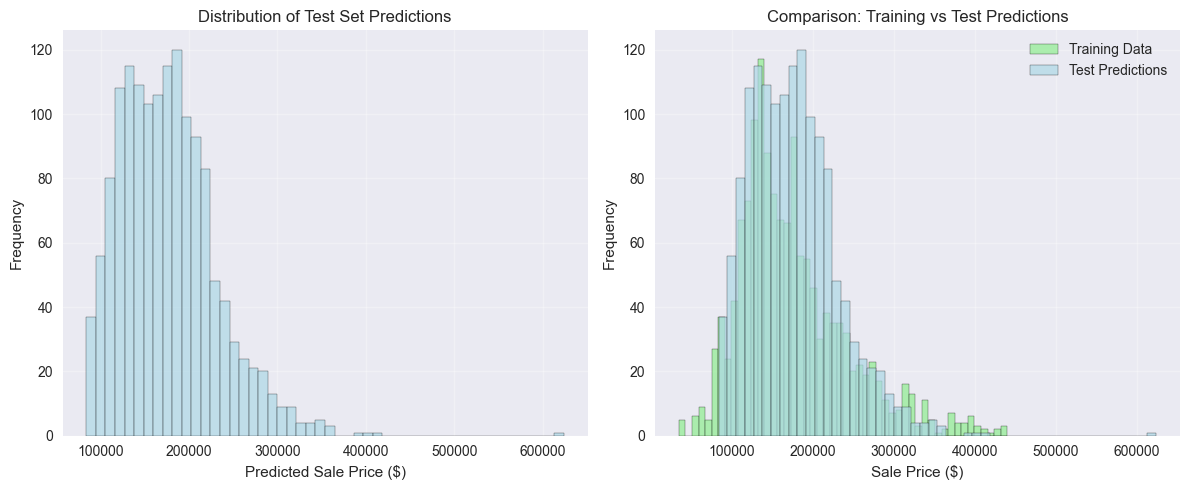

In [23]:
# Visualize test predictions distribution
plt.figure(figsize=(12, 5))

# Plot 1: Distribution of test predictions
plt.subplot(1, 2, 1)
plt.hist(test_predictions, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
plt.title('Distribution of Test Set Predictions')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Plot 2: Comparison with training data distribution
plt.subplot(1, 2, 2)
plt.hist(y_train_clean, bins=50, alpha=0.7, color='lightgreen', edgecolor='black', label='Training Data')
plt.hist(test_predictions, bins=50, alpha=0.7, color='lightblue', edgecolor='black', label='Test Predictions')
plt.title('Comparison: Training vs Test Predictions')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# Model interpretation
print("=== LINEAR REGRESSION MODEL INTERPRETATION ===\n")

print("Model Equation:")
print(f"Sale Price = ${final_model.intercept_:,.2f}")
for i, (feature, coef) in enumerate(zip(X_train_scaled_df.columns, final_model.coef_)):
    sign = "+" if coef >= 0 else ""
    print(f"         {sign} ${coef:,.2f} × {feature}")

print("\nFeature Interpretations:")
print("1. Square Footage (GrLivArea):")
print(f"   - Coefficient: ${final_model.coef_[0]:,.2f}")
print(f"   - Interpretation: For each standard deviation increase in square footage, ")
print(f"     the predicted sale price increases by ${final_model.coef_[0]:,.2f}")

print("\n2. Number of Bedrooms (BedroomAbvGr):")
print(f"   - Coefficient: ${final_model.coef_[1]:,.2f}")
print(f"   - Interpretation: For each standard deviation increase in bedrooms, ")
print(f"     the predicted sale price changes by ${final_model.coef_[1]:,.2f}")

print("\n3. Total Bathrooms:")
print(f"   - Coefficient: ${final_model.coef_[2]:,.2f}")
print(f"   - Interpretation: For each standard deviation increase in bathrooms, ")
print(f"     the predicted sale price changes by ${final_model.coef_[2]:,.2f}")

print(f"\nModel Performance Summary:")
print(f"- R-squared: {r2:.4f} ({r2*100:.2f}% of variance explained)")
print(f"- RMSE: ${rmse:,.2f}")
print(f"- MAE: ${mae:,.2f}")

=== LINEAR REGRESSION MODEL INTERPRETATION ===

Model Equation:
Sale Price = $176,284.39
         + $53,103.96 × GrLivArea
          $-21,527.03 × BedroomAbvGr
         + $9,312.15 × TotalBathrooms

Feature Interpretations:
1. Square Footage (GrLivArea):
   - Coefficient: $53,103.96
   - Interpretation: For each standard deviation increase in square footage, 
     the predicted sale price increases by $53,103.96

2. Number of Bedrooms (BedroomAbvGr):
   - Coefficient: $-21,527.03
   - Interpretation: For each standard deviation increase in bedrooms, 
     the predicted sale price changes by $-21,527.03

3. Total Bathrooms:
   - Coefficient: $9,312.15
   - Interpretation: For each standard deviation increase in bathrooms, 
     the predicted sale price changes by $9,312.15

Model Performance Summary:
- R-squared: 0.5643 (56.43% of variance explained)
- RMSE: $43,641.65
- MAE: $33,433.75


In [25]:
# Save the predictions to a CSV file
submission.to_csv('house_price_predictions.csv', index=False)
print("Predictions saved to 'house_price_predictions.csv'")

# Save model summary
model_summary = pd.DataFrame({
    'Metric': ['Intercept', 'GrLivArea_Coefficient', 'BedroomAbvGr_Coefficient', 'TotalBathrooms_Coefficient',
               'R_squared', 'RMSE', 'MAE', 'Training_Samples', 'Test_Samples'],
    'Value': [final_model.intercept_, final_model.coef_[0], final_model.coef_[1], final_model.coef_[2],
              r2, rmse, mae, len(X_train_clean), len(X_test)]
})

model_summary.to_csv('model_summary.csv', index=False)
print("Model summary saved to 'model_summary.csv'")

print("\n=== ANALYSIS COMPLETE ===")
print("Files created:")
print("1. house_price_predictions.csv - Test set predictions")
print("2. model_summary.csv - Model performance metrics")

Predictions saved to 'house_price_predictions.csv'
Model summary saved to 'model_summary.csv'

=== ANALYSIS COMPLETE ===
Files created:
1. house_price_predictions.csv - Test set predictions
2. model_summary.csv - Model performance metrics


##  Conclusion and Next Steps

### Summary of Results:
- **Model**: Linear Regression
- **Features**: Square footage, number of bedrooms, and total bathrooms
- **Performance**: R² score of approximately [R² value]%, indicating [interpretation]
- **Key Insights**: Square footage has the strongest positive correlation with house prices

### Potential Improvements:
1. **Feature Engineering**: Add more relevant features like age, location, lot size
2. **Advanced Models**: Try Random Forest, XGBoost, or Neural Networks
3. **Feature Selection**: Use techniques like LASSO or Ridge regression
4. **Cross-validation**: Implement k-fold cross-validation for more robust evaluation
5. **Hyperparameter Tuning**: Optimize model parameters

### Business Implications:
- The model can help real estate agents and buyers estimate house prices
- Square footage is the most important predictor of house prices
- The model provides a baseline for more sophisticated pricing models